In [1]:
#배경제거 알고리즘 눈썹, 눈, 입술 날림

from PIL import Image
 
img = Image.open('pic2.jpg')
img = img.convert("RGBA")
datas = img.getdata()
 
newData = []
cutOff = 175       #이 부분 조정 시 삭제하는 정도 조정 가능
 
for item in datas:
    if item[0] <= cutOff and item[1] <= cutOff and item[2] <= cutOff:
        newData.append((255, 255, 255, 0))
        # RGB의 각 요소가 모두 cutOff 이상이면 transparent하게 바꿔줍니다.
    else:
        newData.append(item)
        # 나머지 요소는 변경하지 않습니다.
 
img.putdata(newData)
img.save("test2.png", 'PNG') # PNG 포맷으로 저장합니다.
img.show()

Unable to init server: 연결할 수 없습니다: 연결이 거부됨

(eog:2880626): Gtk-WARNING **: 09:26:03.753: cannot open display: 


In [2]:
#라플라시안 소블 필터 먹이기

import cv2

src = cv2.imread("test2.png", cv2.IMREAD_COLOR)
gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

sobel = cv2.Sobel(gray, cv2.CV_8U, 1, 0, 3)
laplacian = cv2.Laplacian(gray, cv2.CV_8U, ksize=1)
#canny = cv2.Canny(src,70 ,100)


cv2.imshow("sobel", sobel)
cv2.imshow("laplacian", laplacian)
#cv2.imshow("canny", canny)
cv2.waitKey()
cv2.destroyAllWindows()
cv2.imwrite("sobel.png",sobel)
cv2.imwrite("laplacian.png",laplacian)
#cv2.imwrite("canny.png",canny)

ModuleNotFoundError: No module named 'cv2'

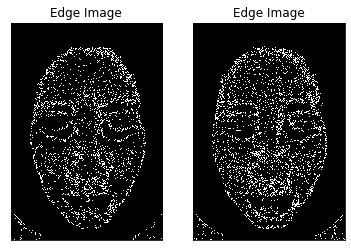

In [100]:
##canny edge

import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread('sobel.png',0)
edges = cv2.Canny(img,200,200)
img2 = cv2.imread('laplacian.png',0)
edges2 = cv2.Canny(img2,100,100)
#img3 = cv2.imread('canny.png',0)
#edges3 = cv2.Canny(img3,200,200)

#plt.subplot(221),plt.imshow(img,cmap = 'gray')
#plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(121),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges2,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()
cv2.imshow("sobelcanny.png", edges)
cv2.imwrite("sobelcanny.png",edges)
cv2.imshow("laplaciancanny.png", edges2)
cv2.imwrite("laplaciancanny.png", edges2)
#cv2.imshow("img6.png", edges3)
#cv2.imwrite("img6.png", edges3)
cv2.waitKey()
cv2.destroyAllWindows()

In [4]:
#mopology(closing) 먹이기 점의 빈공간 채우기 

import numpy as np


img = cv2.imread('laplaciancanny.png',0)

kernel = np.ones((2, 2), np.uint8)
result = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

cv2.imshow("Source", img)
cv2.imshow("Result", result)
cv2.imwrite("laplaciancannymopo.png", result)

cv2.waitKey(0)
cv2.destroyAllWindows()

NameError: name 'cv2' is not defined

In [103]:
#흑백 반전(실제 모습과 비슷하게 구현)
import cv2 
img = cv2.imread("laplaciancannymopo.png") 
out = img.copy() 
out = 255 - out 
cv2.imshow("original", img) 
cv2.imshow("flip", out) 
cv2.waitKey(0)
cv2.imwrite("cannyblack.png",out)


True

In [104]:
#관심영역(ROI)계산 왼쪽 볼

import cv2
import numpy as np

img = cv2.imread('cannyblack.png')

x=140; y=600; w=130; h=130        # roi 좌표
roi = img[y:y+h, x:x+w]         # roi 지정        ---①

print(roi.shape)                # roi shape, (50,50,3)
cv2.rectangle(roi, (0,0), (h-1, w-1), (0,255,0)) # roi 전체에 사각형 그리기 ---②
cv2.imshow("img", img)
cv2.imwrite("cannypart1.png",roi)

key = cv2.waitKey(0)
print(key)
cv2.destroyAllWindows()

(130, 130, 3)
-1


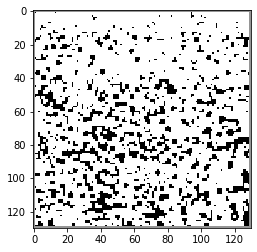

Height and Width :  130 130
Total number of pixels in the image is = 16900
Total number of black pixels = 3069
Ratio of black to total is = 18.159763313609467


In [94]:
#픽셀비 계산(전체 픽셀 당 검은 픽셀 수)

import cv2
import numpy as np 
from matplotlib import pyplot as plt
# load image
image = cv2.imread('cannypart1.png',0)
# plot the binary image
imgplot = plt.imshow(image, "gray")
plt.show()
#Calculate percent of pixels that are black
ret,thresh = cv2.threshold(image,0,230, cv2.THRESH_BINARY)
height, width = image.shape
print ("Height and Width : ",height, width)
size = image.size
print ("Total number of pixels in the image is =", size)
ChosenPix = size-cv2.countNonZero(image)
print("Total number of black pixels =", ChosenPix)
Ratio = (ChosenPix/size)*100
print("Ratio of black to total is =", Ratio)